# Fandango Ratings After Modifying The Bugs of The Rating System

Fandango is a famous movie rating website. In October 2015, a data journalist named Walt Hickey analyzed ratings of movies on Fandango and found that the fandango's rating systems was biased and dishonest.

The biases he found are below:
- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

After this was found, Fandango published it was bugs of the rating system and they would fix them as soon as possible.

Therefore, we will analyze the Fandango's probably modified new ratings and determine whether there has been any changing of Fandango's rating system.

The datasets we use for this project are from [here](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) and [here](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md).

## Preparing Data
### Import Dataset and Read

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fandango_score_comparison = pd.read_csv('fandango_score_comparison.csv')
movie_ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
fandango_score_comparison.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

### Extracting Data for Analysis

In [3]:
fandango_before = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after= movie_ratings_16_17[['movie', 'year', 'fandango']].copy()

In [4]:
fandango_before['Fandango_votes'].describe()

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64

After checking the population of these datasets, we realized that the population of the previous movie ratings is movies with more than 30 fan reviews and that of new movie ratings is popular movies with a significant number of votes.

Thus, we have to slightly change our goal of this project. Now, we have two population of this projects are:
- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

The definition of 'popular' is vague, but as for the data in 2016 there are no information about the popularity. However, according to the source of the data from [GitHub](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) the contributer tells that the data contains 'the most popular movies (with a significant number of votes)', so we assume that we could use the movies of these data as popular. As for the movies in 2015, there are only data with more than 30 fan ratings, so we could also use these as popular.

In [5]:
fandango_before['movie'] = fandango_before['FILM'].copy().str[:-6]
fandango_before['year'] = fandango_before['FILM'].str[-5:-1].astype(int)

fandango_2015 = fandango_before[fandango_before['year']==2015]
fandango_2016 = fandango_after[fandango_after['year']==2016]

In [6]:
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,movie,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,Avengers: Age of Ultron,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,Cinderella,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,Ant-Man,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,Do You Believe?,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,Hot Tub Time Machine 2,2015


In [7]:
fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


## Analyzing Data
### Movie Ratings Distribution Between 2015 and 2016

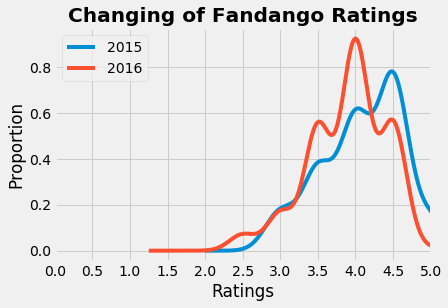

In [21]:
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label=2015)
fandango_2016['fandango'].plot.kde(label=2016)
plt.title('Changing of Fandango Ratings', weight='bold', size='x-large')
plt.xlabel('Ratings')
plt.ylabel('Proportion')
plt.xlim(0, 5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
ax.legend()

In [15]:
freq_2015 = fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index(ascending=False) * 100
freq_2016 = fandango_2016['fandango'].value_counts(normalize=True).sort_index(ascending=False) * 100

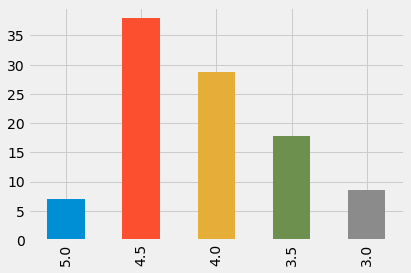

In [16]:
freq_2015.plot.bar()

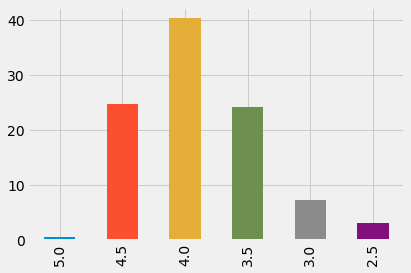

In [17]:
freq_2016.plot.bar()

### Summary of Ratings Between 2015 and 2016

In [18]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


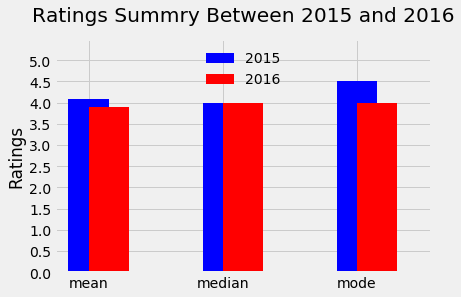

In [20]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(label='2015', align='center', color='blue', width=.3)
summary['2016'].plot.bar(label='2016', align='edge', color='red', width=.3, rot=0)

plt.title('Ratings Summry Between 2015 and 2016', y=1.05)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Ratings')
plt.legend(framealpha = 0, loc = 'upper center')